In [1]:
#
#---------------------------- Libraries ----------------------------
#import math as math
import numpy as np
# import pandas as pd
# from decimal import Decimal
# import scipy.interpolate as interpolate
from scipy.stats import beta, uniform, triang
# import scipy.optimize as optimize
import seaborn as sns

#------------------------- Graphs Library --------------------------
import matplotlib as mpl
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')





In [2]:
#------------------------- Set Graph Style ----------------------------
sns.set()

mpl.rcParams['figure.figsize'] = [4.85410196625, 3.0]
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 150
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['font.size'] = 10


In [3]:
%%HTML 
<style>* div.text_cell {
width: 70ex /* instead of 100%, */
...
}</style>
<style>* div.text_cell_render {
/*font-family: "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;*/
font-family: "Claris SIL", serif; /* Make non-code text serif. */
line-height: 125%; /* added for some line spacing of text. */
width: 65ex; /* instead of 'inherit' for shorter lines */
padding-left:2ex;
font-size: 20px;
...
}</style>
<style>* div.input {
width: 100ex; /* about 80 chars + buffer */
}</style>
<style>* div.output {
    font-size: 125%;
    margin-left: 0ex;
}</style>
<style>
table.dataframe {
    font-size: 95%;
    font-family: 'Helvetica Neue';
    ...
}
</style>


Jess, 

Here is the puzzle about distributions that I mentioned yesterday. 

To set the context, suppose we have two tests that assess what students from a given population know about some topic. Treat a test as a random variable. Let $D_1$ and $D_2$ be the cumulative distribution functions. Use $\mu_1, \mu_2$ be the means and $\sigma_1, \sigma_2$ be the standard deviations. 

Suppose you are given data about these tests collected from the same sample from the population, and a result for a specific student (not in the sample) on only test $1.$ The question is how to "link" this result with a corresponding result on test $2.$ There are two widely used methods. 

For any test distribution $D$, define these "score" functions: 

- The z-score: 

\begin{align*}
\frac{t - \mu_D}{\sigma_D} \\
\end{align*}  

- The p-score (p for "percentile"):

\begin{align*}
100 * D(t) \\
\end{align*}

For each score function, define a link function that maps a test result $t$ from test 1 to a corresponding result on test 2 by equating the score:

- The z-link $z(t)$ solves

\begin{align*}
\frac{t - \mu_1}{\sigma_1} &= \frac{z(t) - \mu_2}{\sigma_2}
\end{align*}

- The p-link $p(t)$ solves  

\begin{align*}
D_1(t) &= D_2(p(t))
\end{align*}

Under the assumption that the tests generate the same rank ordering of the students, the p-link is the most natural way to link the two tests. In practice, the z-link tends to be used when only the means and standard deviations of the results from the sample population are available.

I started looking at this for two real tests. This figure shows the distributions of scores and, incidentally, illustrates the calculation of the p-link. 

![](panel.png)


The next figure plots the graph of p-link function and compare it the z-link function, which is, in effect, an affine approximation. The natural way to do this, it seemed to me, was to use z-score units on each axis; that is distance from the mean in standard deviations. 

The puzzle is that the z-link function is a surprisingly good approximation in the region $\mu \pm \sigma.$ 

Here is what the p-link and z-link functions look like in this case:
![](z_and_p.png)

Notice that by definition, z-link function passes through the grid intersection points. 

I've concluded that the z-link is a reasonably good approximation for in the region $\mu \pm \sigma$ for a large class of distributions. I'll illustrate using the triangular distributions on $[0,1]$ paramterized by the mode $c$. 

Here is a graph of the $9$ distributions with modes ranging from $0.1$ to $0.9:$

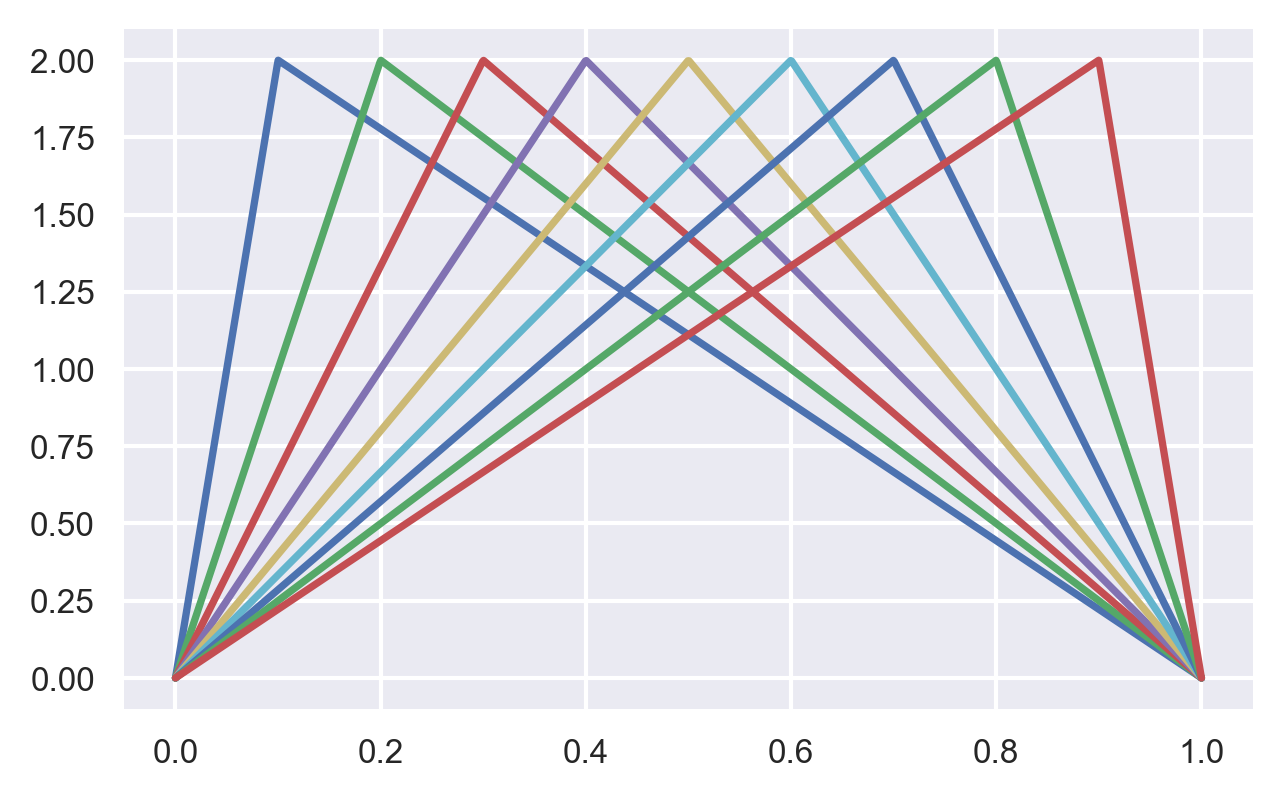

In [4]:
plt.figure()
ax = np.linspace(0.0,1.0,1000)
for k in range(1,10):
    c = k/10
    plt.plot(ax, (triang.pdf(ax, c)))


Next, the same graph using z-score units on the x-axis:

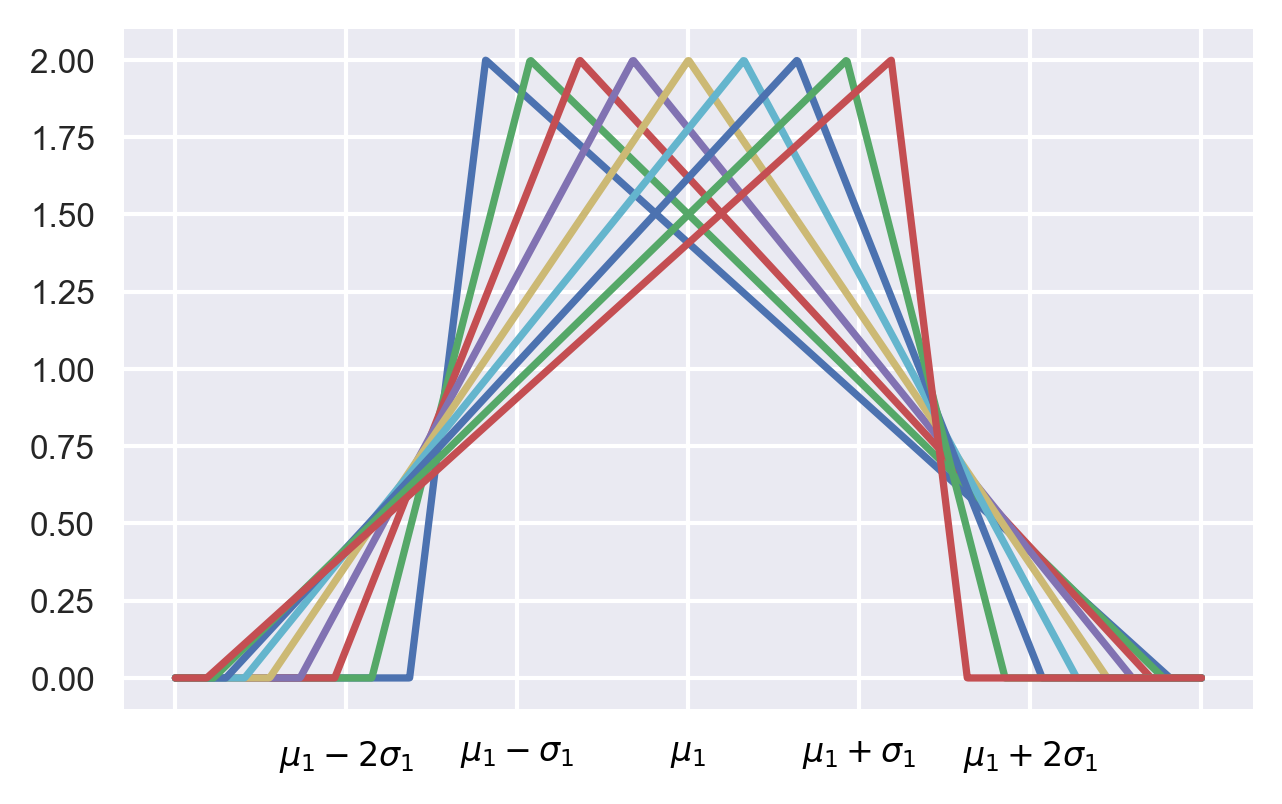

In [5]:
plt.figure()
for k in range(1,10):
    c = k/10
    m = triang.stats(c, moments = 'm')
    s = triang.stats(c, moments = 'v')**0.5
    ax = np.linspace(-3,3,1000)
    
    plt.plot(ax, (triang.pdf((ax*s + m), c)))

    xtick_std = [ ix  for ix in range(-3,4)]
    ytick_std = [ iy  for iy in range(-3, 4)]
    plt.xticks(xtick_std, ('',
                           '$\mu_1-2\sigma_1$',
                           '$\mu_1-\sigma_1$',
                           '$\mu_1$',
                           '$\mu_1+\sigma_1$',
                           '$\mu_1+2\sigma_1$',
                           ''
                          ),
               color = 'k'
              )


I'll pick as the distribution for test 1 the one with a mode at c = 0.5. Then I can look at possible distributions for test 2 from these 9. The choice for test 1 does not matter. In general, the quality of the approximation is a function of the difference between test 1 and test 2. As always, I'll use the z-score units on both axes. 

Here is what the p-link function looks like when test 2 has the two extreme distributions with c = 0.1 and c = 0.9:

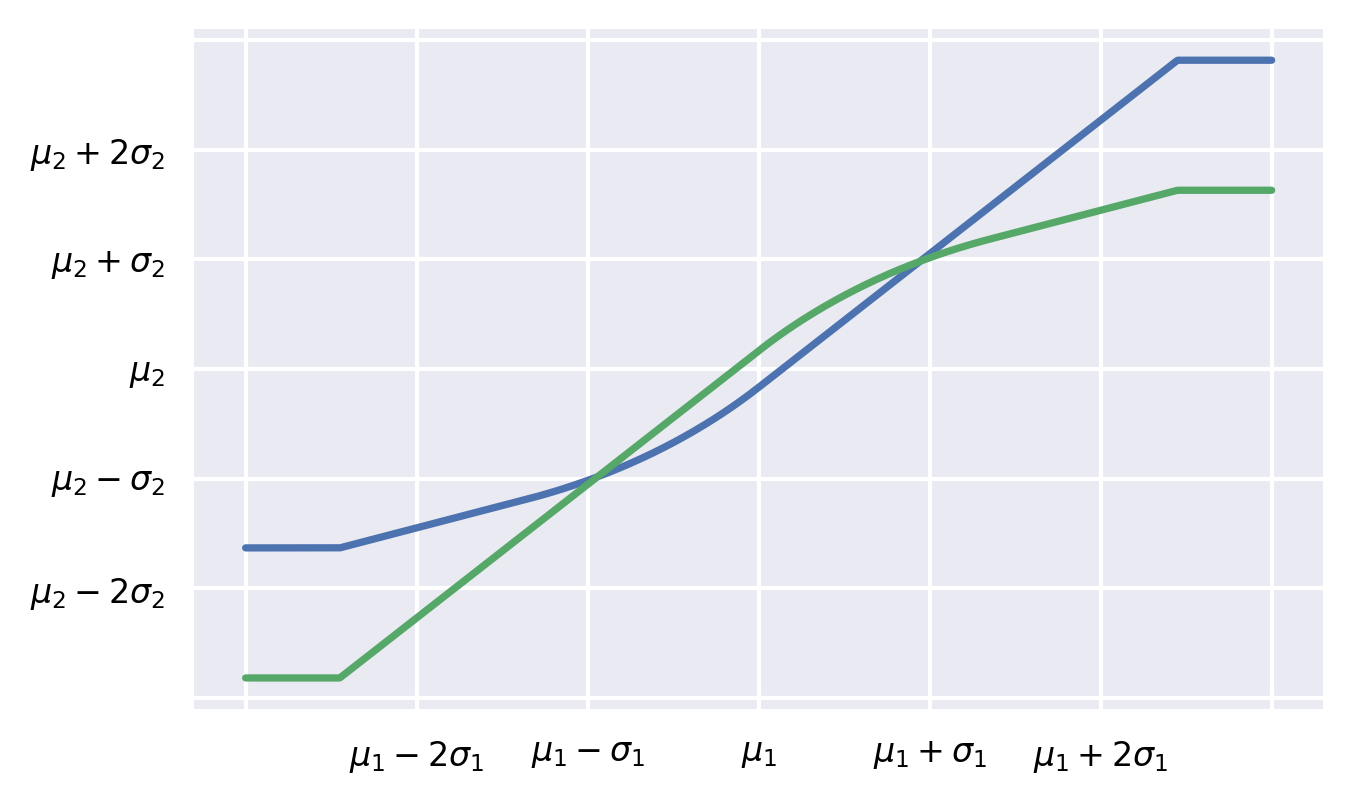

In [6]:
plt.figure()
c_1 = 0.5
m_1 = triang.stats(c_1, moments = 'm')
s_1 = triang.stats(c_1, moments = 'v')**0.5
ax = np.linspace(-3,3,1000)

list = [1, 9]

for k in list:
    c_2 = k/10
    m_2 = triang.stats(c_2, moments = 'm')
    s_2 = triang.stats(c_2, moments = 'v')**0.5
    
    plt.plot(ax, (triang.ppf(triang.cdf(ax*s_1 + m_1, c_1), c_2) - m_2)/s_2)

#     plt.plot(ax, (((triang.ppf(triang.cdf((ax*s_1 + m_1), c_1), c_2))-m_2)/s_2))

    xtick_std = [ ix  for ix in range(-3,4)]
    ytick_std = [ iy  for iy in range(-3, 4)]
    plt.xticks(xtick_std, ('',
                           '$\mu_1-2\sigma_1$',
                           '$\mu_1-\sigma_1$',
                           '$\mu_1$',
                           '$\mu_1+\sigma_1$',
                           '$\mu_1+2\sigma_1$',
                           ''
                          ),
               color = 'k'
              )
plt.yticks(ytick_std, ('',
                       '$\mu_2-2\sigma_2$',
                       '$\mu_2-\sigma_2$',
                       '$\mu_2$',
                       '$\mu_2+\sigma_2$',
                       '$\mu_2+2\sigma_2$',
                       ''),
           color = 'k'
          );

The graph of the z-link function will pass exactly through the grid points

$$(\mu_1+m*\sigma_1, \mu_2+m*\sigma_2)$$

So the thing to notice is that the p-link function passes almost exactly through the intersections one standard deviation on either side of the mean, $\mu \pm \sigma$ and is therefore almost equal to the z-link function at those points. 

This means that the z-link function, defined using the mean and standard deviation of the two distributions and no information about the value of either CDF at any point in its support, ends up being a good approximation to the p-link function defined in terms of the values of the two CDFs. So in some sense the puzzle here is about the relationship between the first two moments of a CDF and its values at $\mu \pm \sigma.$


The next graph shows the p-link function for 

$$c \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$$ 

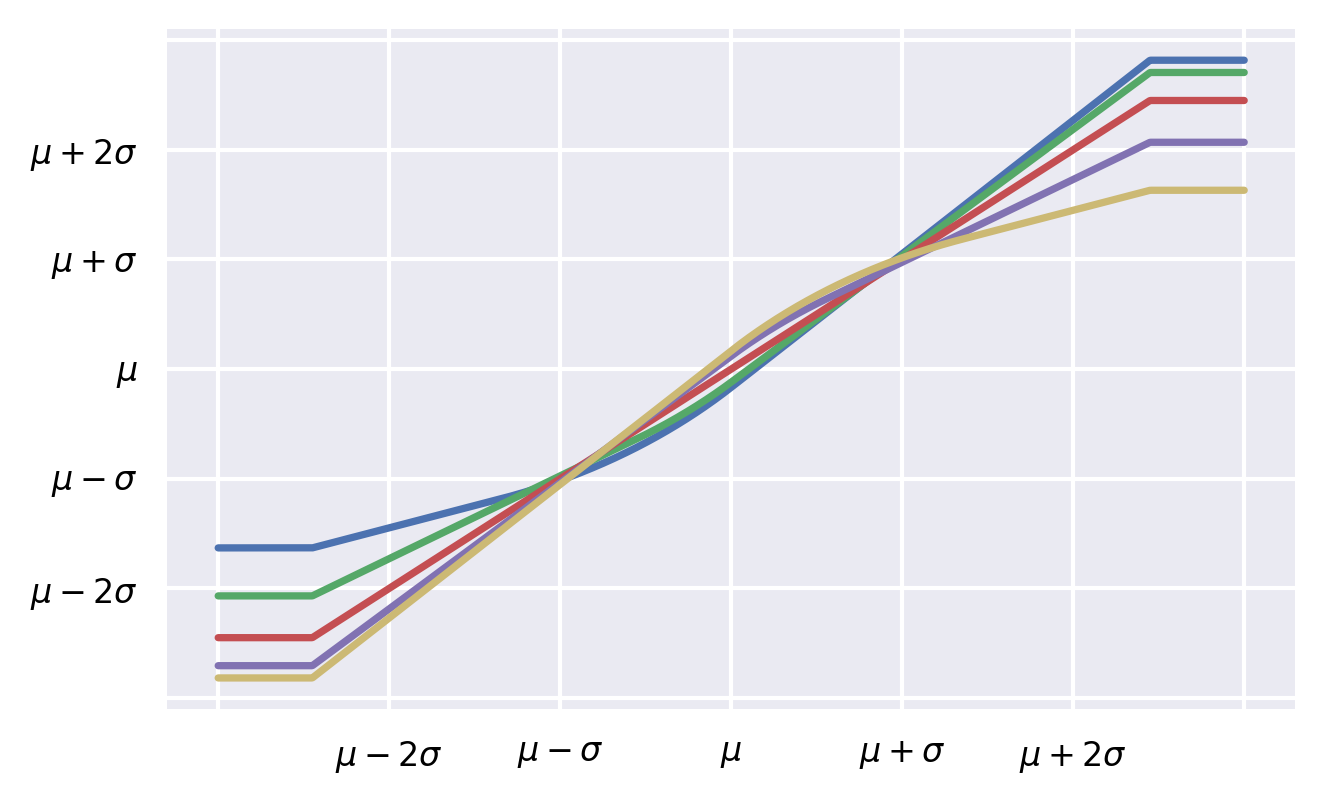

In [7]:
plt.figure()
c_1 = 0.5
m_1 = triang.stats(c_1, moments = 'm')
s_1 = triang.stats(c_1, moments = 'v')**0.5
ax = np.linspace(-3,3,1000)

list = [1,3,5,7,9]

for k in list:
    c_2 = k/10
    m_2 = triang.stats(c_2, moments = 'm')
    s_2 = triang.stats(c_2, moments = 'v')**0.5
    
    plt.plot(ax, (triang.ppf(triang.cdf(ax*s_1 + m_1, c_1), c_2) - m_2)/s_2)

#     plt.plot(ax, (((triang.ppf(triang.cdf((ax*s_1 + m_1), c_1), c_2))-m_2)/s_2))

    xtick_std = [ ix  for ix in range(-3,4)]
    ytick_std = [ iy  for iy in range(-3, 4)]
    plt.xticks(xtick_std, ('',
                           '$\mu-2\sigma$',
                           '$\mu-\sigma$',
                           '$\mu$',
                           '$\mu+\sigma$',
                           '$\mu+2\sigma$',
                           ''
                          ),
               color = 'k'
              )
plt.yticks(ytick_std, ('',
                       '$\mu-2\sigma$',
                       '$\mu-\sigma$',
                       '$\mu$',
                       '$\mu+\sigma$',
                       '$\mu+2\sigma$',
                       ''),
           color = 'k'
          );

Next, I'll print out the values of the p-link function at 

$$\mu_1 -\sigma_1, \mu_1, \mu_1 + \sigma_1$$

to show that the value of the p-link function at $\mu_1 \pm \sigma_1$ is closer to being on the 45 degree line than is the value at $\mu$, but does not lie exactly on this line (except in the case where $c=0.5$ for both distributions, in which case the p-link function is a straight line that passes through all the grid points):

In [8]:
def show(x_):
    return print(f'{float(x_):.2f}')

c_1 = 0.5
m_1 = triang.stats(c_1, moments = 'm')
s_1 = triang.stats(c_1, moments = 'v')**0.5
ax = np.linspace(-3,3,1000)

for k in range(1,10):
    c_2 = k/10
    m_2 = triang.stats(c_2, moments = 'm')
    s_2 = triang.stats(c_2, moments = 'v')**0.5
    string_0 = f'{(triang.ppf(triang.cdf(-1.0*s_1 + m_1, c_1), c_2) - m_2)/s_2:.3f}'
    string_1 = f'{(triang.ppf(triang.cdf(0.0*s_1 + m_1, c_1), c_2) - m_2)/s_2:.3f}'
    string_2 = f'{(triang.ppf(triang.cdf(1.0*s_1 + m_1, c_1), c_2) - m_2)/s_2:.3f}'
    print(string_0, string_1, string_2)
#     print(f'{(triang.ppf(triang.cdf(-1.0*s_1 + m_1, c_1), c_2) - m_2)/s_2:.3f},//
#           {(triang.ppf(triang.cdf(1.0*s_1 + m_1, c_1), c_2) - m_2)/s_2:.3f}');


-1.015 -0.167 1.051
-0.985 -0.150 1.045
-0.974 -0.119 1.034
-0.983 -0.070 1.018
-1.000 0.000 1.000
-1.018 0.070 0.983
-1.034 0.119 0.974
-1.045 0.150 0.985
-1.051 0.167 1.015


So the question for you is whether you can see any reason why this rough equality at $\mu \pm \sigma$ holds? I've got a strong sense that I'm missing something obvious and hoping that you might see what it is. 

I don't think that this can be understood by treating the normal distribution with the same mean and standard deviation as approximations to the two distributions, because in this case, we'd expect the fit to be as good at $\mu$ as at the points one standard deviation on either side. 

I suspect that the key is to use the fact that the CDF of a random variable x has a uniform distribution on $[0,1]$ but I'm not sure how to take advantage of this result. For what it's worth, I can replace the triangle distributions with uniform distributions with support

$$[c - 0.05, c + 0.05]$$

In this case, every pair of values for $c$ and every choice for the support of the uniform yields a graph that looks exactly like this: 


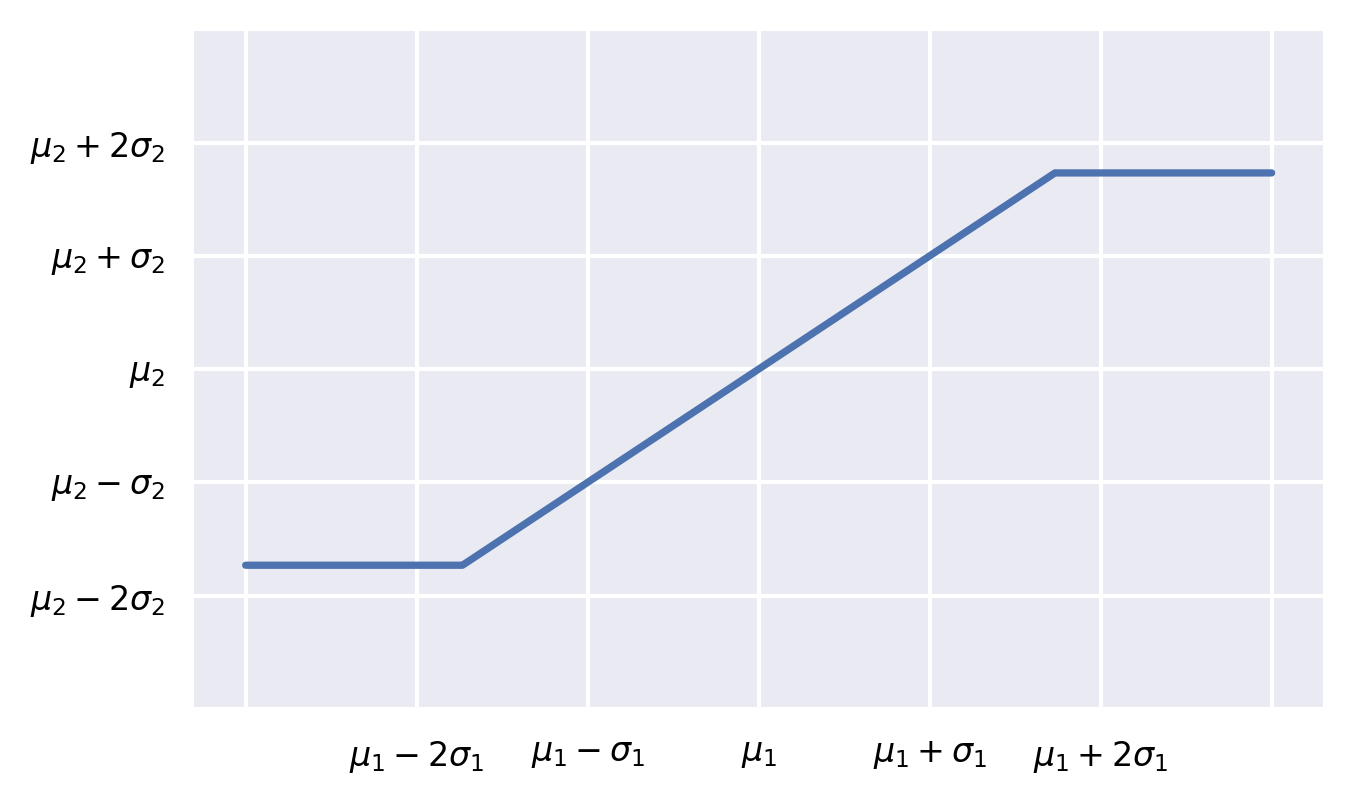

In [9]:
plt.figure()
n = 10
c_1 = 0.5
m_1 = uniform.stats(c_1, 1/n, moments = 'm')
s_1 = uniform.stats(c_1, 1/n, moments = 'v')**0.5
ax = np.linspace(-3,3,1000)

list = [5]

for k in list:
    c_2 = k/10
    m_2 = uniform.stats(c_2, 1/n, moments = 'm')
    s_2 = uniform.stats(c_2, 1/n, moments = 'v')**0.5
    
    plt.plot(ax, (uniform.ppf(uniform.cdf(ax*s_1 + m_1, c_1, 1/n), c_2, 1/n) - m_2)/s_2)

#     plt.plot(ax, (((triang.ppf(triang.cdf((ax*s_1 + m_1), c_1), c_2))-m_2)/s_2))

    xtick_std = [ ix  for ix in range(-3,4)]
    ytick_std = [ iy  for iy in range(-3, 4)]
    plt.xticks(xtick_std, ('',
                           '$\mu_1-2\sigma_1$',
                           '$\mu_1-\sigma_1$',
                           '$\mu_1$',
                           '$\mu_1+\sigma_1$',
                           '$\mu_1+2\sigma_1$',
                           ''
                          ),
               color = 'k'
              )
plt.yticks(ytick_std, ('',
                       '$\mu_2-2\sigma_2$',
                       '$\mu_2-\sigma_2$',
                       '$\mu_2$',
                       '$\mu_2+\sigma_2$',
                       '$\mu_2+2\sigma_2$',
                       ''),
           color = 'k'
          );

To push this one step further, here is what the p-link function looks like when test 1 has a triangle distribution with c = 0.5 and test 2 has a uniform distribution around 0.1:

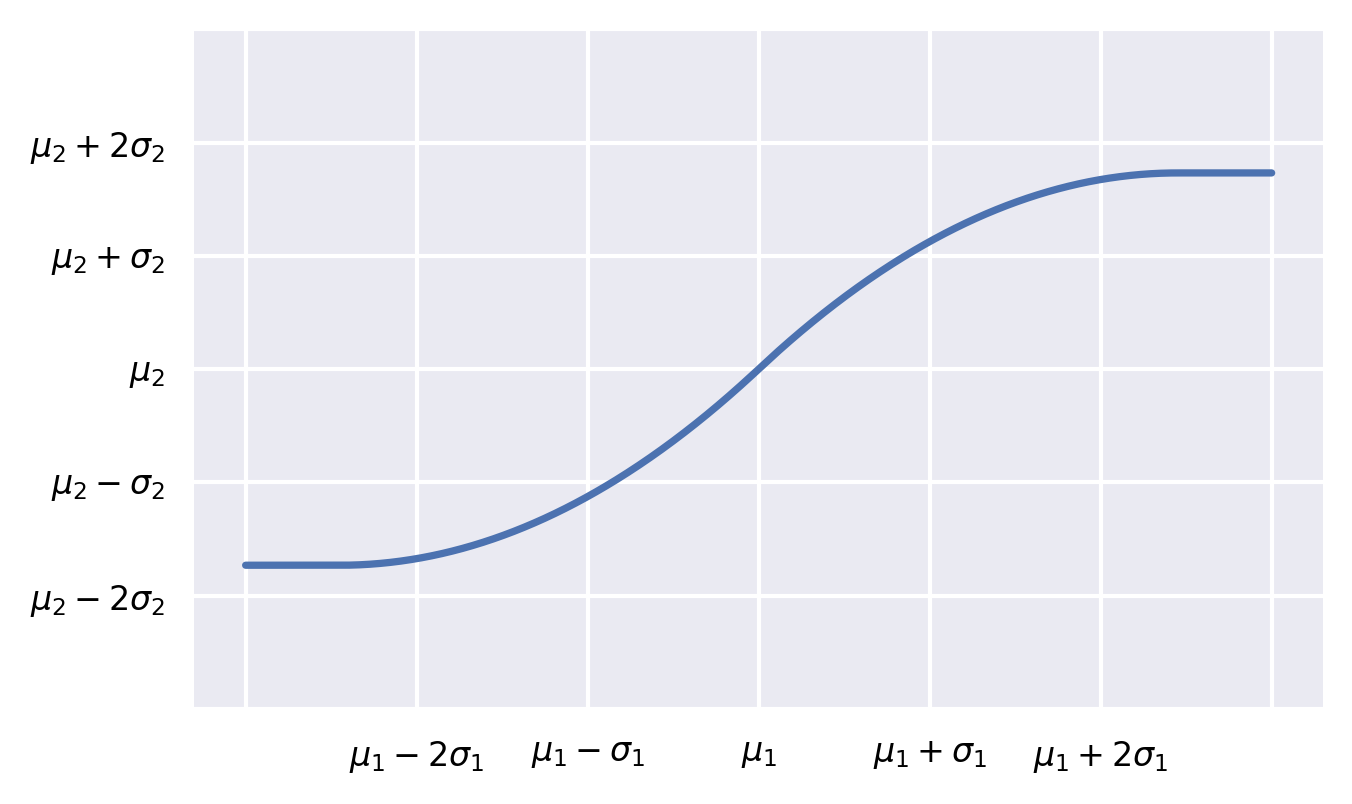

In [10]:
plt.figure()
n = 10
c_1 = 0.5
m_1 = triang.stats(c_1, moments = 'm')
s_1 = triang.stats(c_1, moments = 'v')**0.5
ax = np.linspace(-3,3,1000)

list = [1]

for k in list:
    c_2 = k/10
    m_2 = uniform.stats(c_2, 1/n, moments = 'm')
    s_2 = uniform.stats(c_2, 1/n, moments = 'v')**0.5
    
    plt.plot(ax, (uniform.ppf(triang.cdf(ax*s_1 + m_1, c_1), c_2, 1/n) - m_2)/s_2)

#     plt.plot(ax, (((triang.ppf(triang.cdf((ax*s_1 + m_1), c_1), c_2))-m_2)/s_2))

    xtick_std = [ ix  for ix in range(-3,4)]
    ytick_std = [ iy  for iy in range(-3, 4)]
    plt.xticks(xtick_std, ('',
                           '$\mu_1-2\sigma_1$',
                           '$\mu_1-\sigma_1$',
                           '$\mu_1$',
                           '$\mu_1+\sigma_1$',
                           '$\mu_1+2\sigma_1$',
                           ''
                          ),
               color = 'k'
              )
plt.yticks(ytick_std, ('',
                       '$\mu_2-2\sigma_2$',
                       '$\mu_2-\sigma_2$',
                       '$\mu_2$',
                       '$\mu_2+\sigma_2$',
                       '$\mu_2+2\sigma_2$',
                       ''),
           color = 'k'
          );

Finally, here is what happens when I reverse roles and have test 1 be uniform around 0.5 and test 2 be triangular around 0.1:

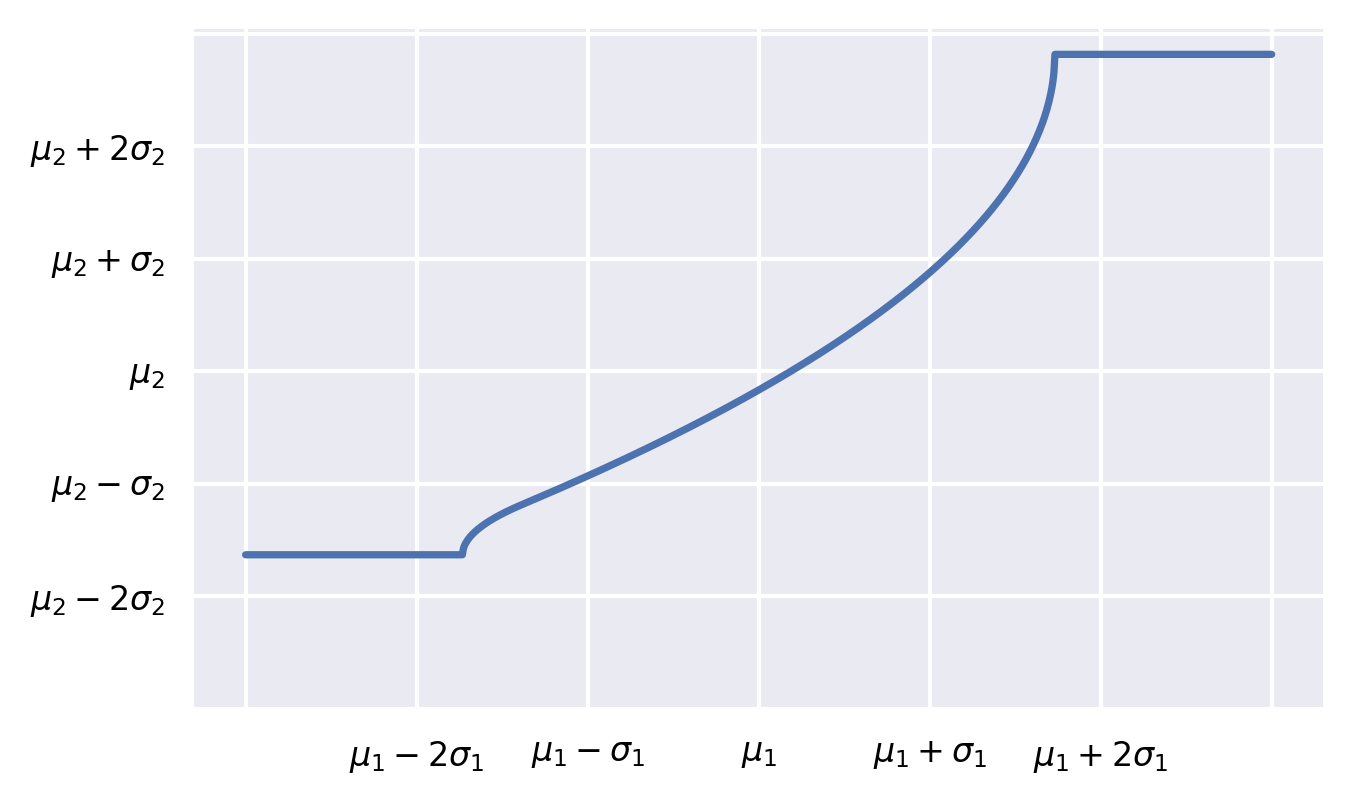

In [11]:
plt.figure()
n = 10
c_1 = 0.5
m_1 = uniform.stats(c_1, 1/n, moments = 'm')
s_1 = uniform.stats(c_1, 1/n, moments = 'v')**0.5
ax = np.linspace(-3,3,1000)

list = [1]

for k in list:
    c_2 = k/10
    m_2 = triang.stats(c_2, moments = 'm')
    s_2 = triang.stats(c_2, moments = 'v')**0.5
    
    plt.plot(ax, (triang.ppf(uniform.cdf(ax*s_1 + m_1, c_1, 1/n), c_2) - m_2)/s_2)

#     plt.plot(ax, (((triang.ppf(triang.cdf((ax*s_1 + m_1), c_1), c_2))-m_2)/s_2))

    xtick_std = [ ix  for ix in range(-3,4)]
    ytick_std = [ iy  for iy in range(-3, 4)]
    plt.xticks(xtick_std, ('',
                           '$\mu_1-2\sigma_1$',
                           '$\mu_1-\sigma_1$',
                           '$\mu_1$',
                           '$\mu_1+\sigma_1$',
                           '$\mu_1+2\sigma_1$',
                           ''
                          ),
               color = 'k'
              )
plt.yticks(ytick_std, ('',
                       '$\mu_2-2\sigma_2$',
                       '$\mu_2-\sigma_2$',
                       '$\mu_2$',
                       '$\mu_2+\sigma_2$',
                       '$\mu_2+2\sigma_2$',
                       ''),
           color = 'k'
          );